In [ ]:
import cv2 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model, load_model
from keras import backend as K
import numpy as np
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


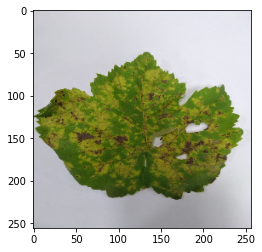

In [ ]:
d = cv2.imread('/content/drive/MyDrive/testing/4 scale/IMG_20201213_134049.jpg')
d= cv2.cvtColor(d, cv2.COLOR_BGR2RGB)
d = cv2.resize(d, (256,256))
plt.imshow(d)
d = d.reshape(-1,256,256,3)


In [ ]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [ ]:
model = load_model('/content/drive/MyDrive/first_model.hd5', custom_objects={'mean_iou': mean_iou})

In [ ]:
preds_test = model.predict(d, verbose=1)


1/1 [==============================] - 0s 449ms/step


In [ ]:
preds_test_t = (preds_test > 0.5).astype(np.uint8)

In [ ]:
preds_test_t = preds_test_t * 255

preds = np.reshape(preds_test_t, (256,256))

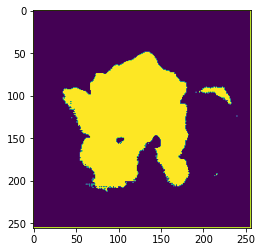

In [ ]:
plt.imshow(preds)

In [ ]:
cv2.imwrite('/content/drive/MyDrive/mask.png',preds)

True

In [ ]:
org_raster_image=Image.open("/content/drive/MyDrive/testing/4 scale/IMG_20201213_134049.jpg")
newsize= (256,256)
im1 = org_raster_image.resize(newsize)
pixels_raster = im1.load()
(width,height)=im1.size
#print(width)
#cropped_img = np.zeros((width, height, 3 ), dtype=np.uint8)
crop = Image.new( 'RGB', (height,width), "black") # create a new black image
crop_pixels=crop.load()
mask=Image.open("/content/drive/MyDrive/mask.png").convert('L')
mask_array=np.array(mask)
pixels_mask = mask.load()
for i in range(mask.size[0]):    # for every col:
    for j in range(mask.size[1]):    # For every row
        if(pixels_mask[i,j] ==255):
            r, g, b = pixels_raster[i,j]
            crop_pixels[i,j]=(r,g,b)
#cropped_img = crop
crop.save('cropped_leaf.png')

crop.show()

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/leaf_diseases_coloured.h5")

In [ ]:
categories = ["0 scale", "1 scale", "2 scale", "3 scale", "4 scale"]

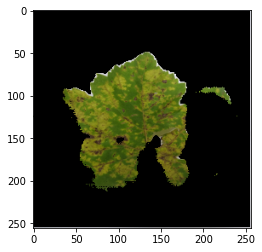

In [ ]:
m = '/content/cropped_leaf.png'
img = cv2.imread(m)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256,256))
plt.imshow(img)


In [ ]:
img = img.reshape(-1,256,256,3)

In [ ]:
predict_class = new_model.predict_classes(img)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
categories[predict_class[0]]

'3 scale'